# Charger nos données

In [235]:
import pandas as pd


**Lire notre fichier en utilisant pandas**

In [236]:
fichier = "heart.csv"
df = pd.read_csv(fichier)

**Afficher les 5 premières lignes de notre jeux de données**

In [237]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Afficher les informations sur les attributs de nos données**

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Vérifier si il n'existe pas une case vide**

In [239]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Afficher la describtion de notre dataset**

In [240]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Déviser notre jeux de données en 2 groupe un numérique et l'autre catégorie**

In [241]:
numeric = ['Age', 'RestingBP', 
           'Cholesterol',  'MaxHR',
           'Oldpeak']
categorical = ['Sex', 'ChestPainType', 'FastingBS', 
               'RestingECG', 'ExerciseAngina','ST_Slope']

# Visualisation et traitement de nos données

**Affficher la distribution des attaques cardiaques**

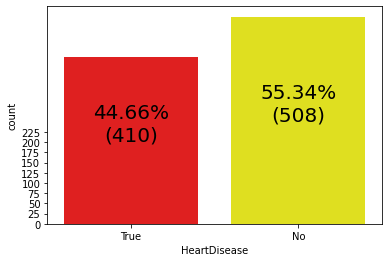

In [242]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
target_count = df['HeartDisease'].value_counts() #calculer les 0 et les 1 dans target
target_color = ['red', 'yellow']
plt.style.context('ggplot')
plt.figure()
sns.countplot(data=df, x='HeartDisease', palette=target_color)
for name , val in zip(target_count.index, target_count.values):
    plt.text(name, val/2, f'{round(val/sum(target_count)*100, 2)}%\n({val})', ha='center',
              color='black', fontdict={'fontsize':20})
plt.xticks(ticks=target_count.index, labels=['No', 'True'])
plt.yticks(np.arange(0, 230, 25))
plt.show()

**Affichage de la matrice de corrélation**

On peut pas afficher tous les attributs car ils sont de type Objet

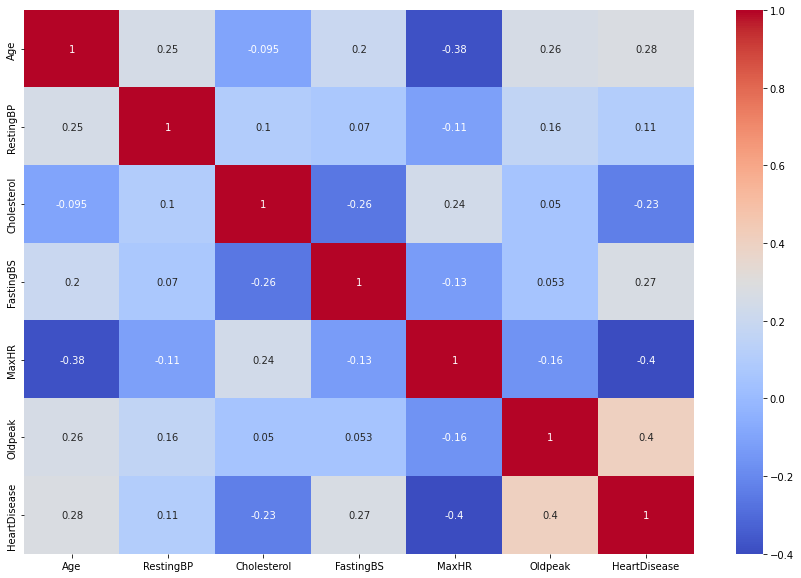

In [243]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

**Afficher que les histogrames des attributs de type numérique**

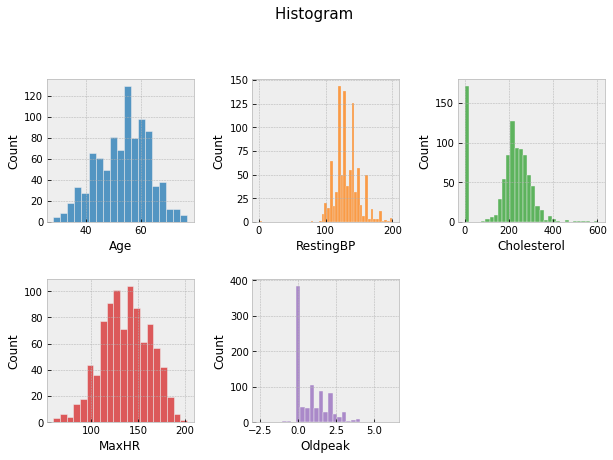

In [244]:
colors = sns.color_palette()
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, numeric)):
        plt.subplot(3, 3, i+1)
        sns.histplot(data=df, x=name, color=col)
    plt.suptitle('Histogram ', fontsize=15)

**créer un nouveau dataframe en concaténant 3 attributs(FastingBS,Oldpeak,HeartDisease) par colonne est les regrouper par target**

In [245]:
df2 = pd.concat([df[['FastingBS', 'Oldpeak']],df['HeartDisease']],axis=1)
df2.groupby(by='HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

**Afficher la boite à moustache de FastingBS, Oldpeak par l'attribut target**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


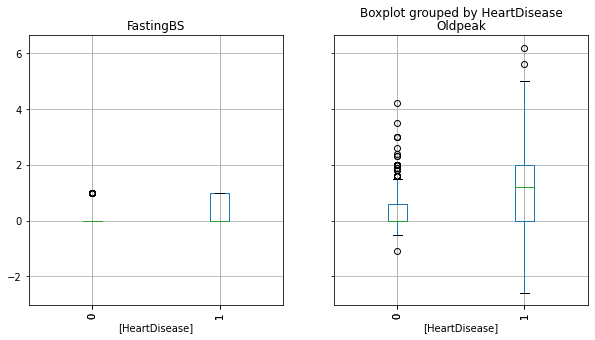

In [246]:
df2.boxplot(by='HeartDisease', rot=90, layout=(1, 3), figsize=(15,5))
print()

Afficher la distribution des données entres eux

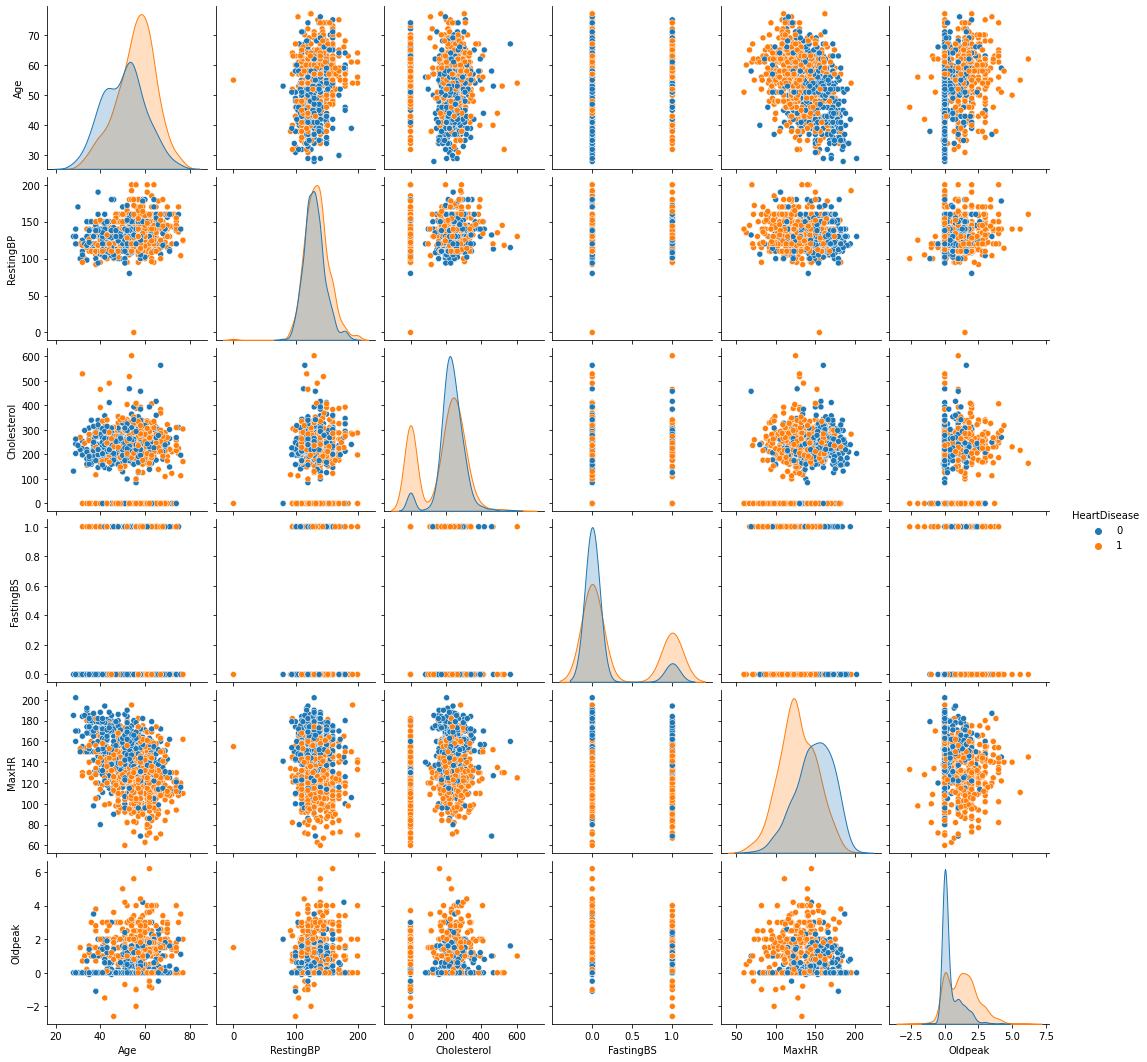

In [247]:
sns.pairplot(df,hue="HeartDisease");

**le but de cette fonction est de normalisé les attributs numérique et labellisé les attributs de type catégorie en utilisant la bibliothèque sklean**

In [248]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
def feature_processing(data, numeric_cols, categorical_cols, target_col, skew_limit = 0.75):
    data_num = data[numeric_cols].apply(pd.to_numeric, errors = ('coerce'))
    skew_vals = data_num.skew()
    skew_cols = (skew_vals.sort_values(ascending = False).to_frame().rename(columns = {0:'Skew'}).query('abs(Skew) > {}'.format(skew_limit)))
    for col in skew_cols.index.values:
        data_num[col] = data_num[col].apply(np.log1p)
    
    data_num.fillna(data_num.mean(), inplace = True)
    data_num = data_num.replace([np.inf, -np.inf],0)
    
    other_num_cols = [x for x in numeric_cols if x not in skew_cols]
    
    scaler = StandardScaler()
    scaler.fit(data_num[other_num_cols])
    data_num[other_num_cols] = scaler.transform(data_num[other_num_cols])
    data_cat = data[categorical_cols]
    data_cat = data_cat.apply(LabelEncoder().fit_transform)
    data_transformed = pd.concat([data_num, data_cat], axis = 1)
    data_transformed[target_col] = data[target_col]
    
    return data_transformed

In [249]:
new_df = feature_processing(df,numeric,categorical,'HeartDisease' )
#appliquer la fonction de normalisation et labellésation sur notre dataset 

**Réafficher une autre fois notre matrice de corrélations avec des données normalisé**

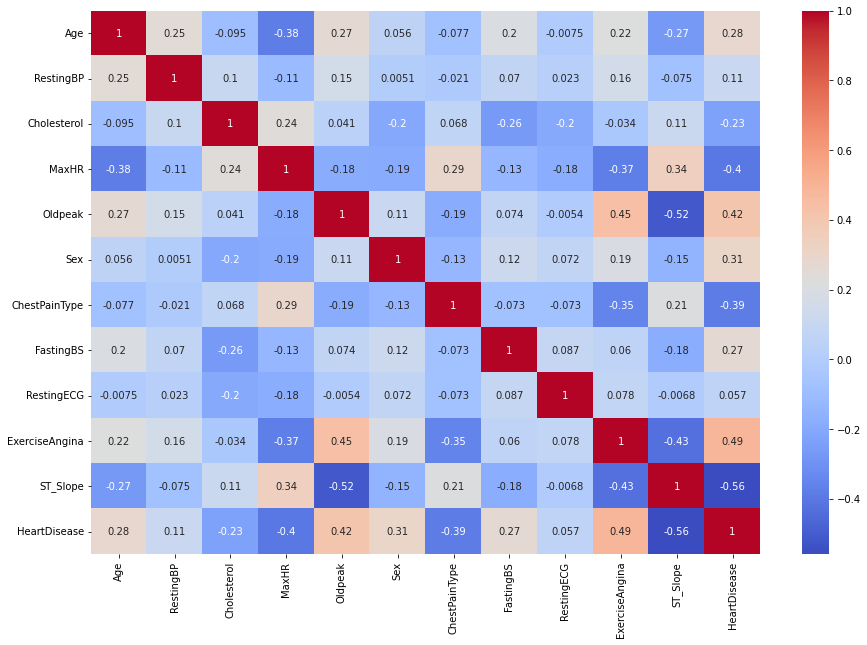

In [250]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(), cmap='coolwarm', annot=True)
plt.show()

**Réafficher une autre fois nos boites de moustache avec des données normalisé**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

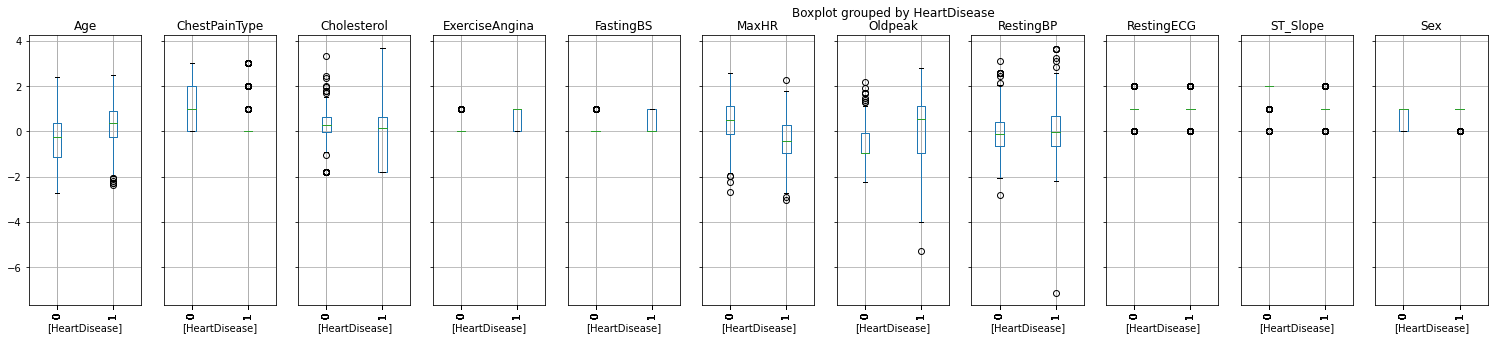

In [251]:
df2 = new_df.copy()
df2.boxplot(by='HeartDisease', rot=90, layout=(1, 13), figsize=(30,5))
print()

**Afficher histogrames des attributs de catégorie apres la labellésation**

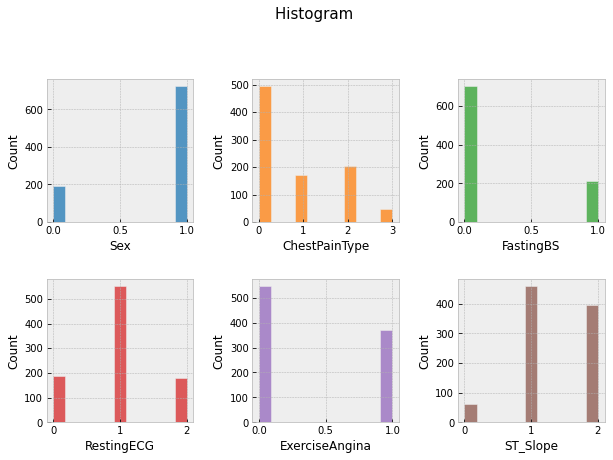

In [252]:
colors = sns.color_palette()
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, categorical)):
        plt.subplot(3, 3, i+1)
        sns.histplot(data=new_df, x=name, color=col)
    plt.suptitle('Histogram ', fontsize=15)

# Dévision de nos données

In [253]:
from sklearn.model_selection import train_test_split


In [254]:
features = ['Age', 'Oldpeak','Sex','FastingBS','ExerciseAngina']
X = new_df[features]
y = new_df['HeartDisease']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(new_df.loc[:, new_df.columns != 'HeartDisease'], new_df["HeartDisease"], test_size=0.2, random_state=101)

#comparison un entrainement d'un classifieur en utilisant les meme données
**le 1 classifieur contient que 4 attributs [Age, Oldpeak,Sex,FastingBS,ExerciseAngina ]**   
**ET l'autre contient tous les attributs**

In [256]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

classifier_total = SVC()
classifier_total.fit(X_train_total, y_train_total)
preds_total = classifier_total.predict(X_test_total)

**Affichage les Information sur le 1er svc entrainé**

In [257]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        79
           1       0.81      0.78      0.80       105

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



**Calcule les accuracy des 2 classifieur**

In [258]:
svc_acc1 = accuracy_score(y_test, preds)
svc_total_acc = accuracy_score(y_test_total, preds_total)

Afficher les taux d'accuracy % entres les 2 classifieurs   
le 1 er celui entrainé avec 4 attributs  
le 2 ème celui entrainé avec tous les attributs 

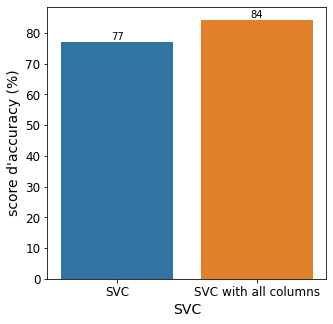

In [259]:
plt.figure(figsize=(5,5))

classifier_list = ['SVC', 'SVC with all columns']
#Creating the barplot and showing the accuracy score for each method
chart = sns.barplot(x=classifier_list, y=[svc_acc1*100,svc_total_acc*100], palette = 'tab10')
for p in chart.patches:
             chart.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.xlabel('SVC', fontsize=14)
plt.ylabel('score d\'accuracy (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Accuracy Score for Different Classification Methods', fontsize=20)

plt.show()

# D'autre classifieurs
on prend 80% de nos données pour l'apprentissage et 20% pour les teste  
On prend tous les attributs sauf le target comme input  
utilisé plusieur classifieur pour (SVC,TreeDecision,RandomForest,Bayse,KNN,Logistic regression)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(new_df.loc[:, new_df.columns != 'HeartDisease'], new_df["HeartDisease"], test_size=0.2, random_state=101)

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [262]:
log_class = LogisticRegression()
log_class.fit(X_train, y_train) #logistic regressionn

knn_class = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_class.fit(X_train, y_train) #KNN

nb_class = GaussianNB()
nb_class.fit(X_train, y_train) #Bayse

tree_class = DecisionTreeClassifier(criterion='entropy')
tree_class.fit(X_train, y_train) #Tree

rf_class = RandomForestClassifier(criterion='entropy')
rf_class.fit(X_train, y_train) #RandomForest

RandomForestClassifier(criterion='entropy')

**Calculer les accuracy de nos modèle**

In [263]:
log_preds = log_class.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

knn_preds = knn_class.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)

nb_preds = nb_class.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)

tree_preds = tree_class.predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)

rf_preds = rf_class.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

In [264]:
accuracy_list = []
svc_acc = accuracy_score(y_test, preds_total)

accuracy_list.append(100*svc_acc)
accuracy_list.append(100*log_acc)
accuracy_list.append(100*knn_acc)
accuracy_list.append(100*nb_acc)
accuracy_list.append(100*tree_acc)
accuracy_list.append(100*rf_acc)

Afficher les accuracy de tous nos classifieurs et comparer entre eux

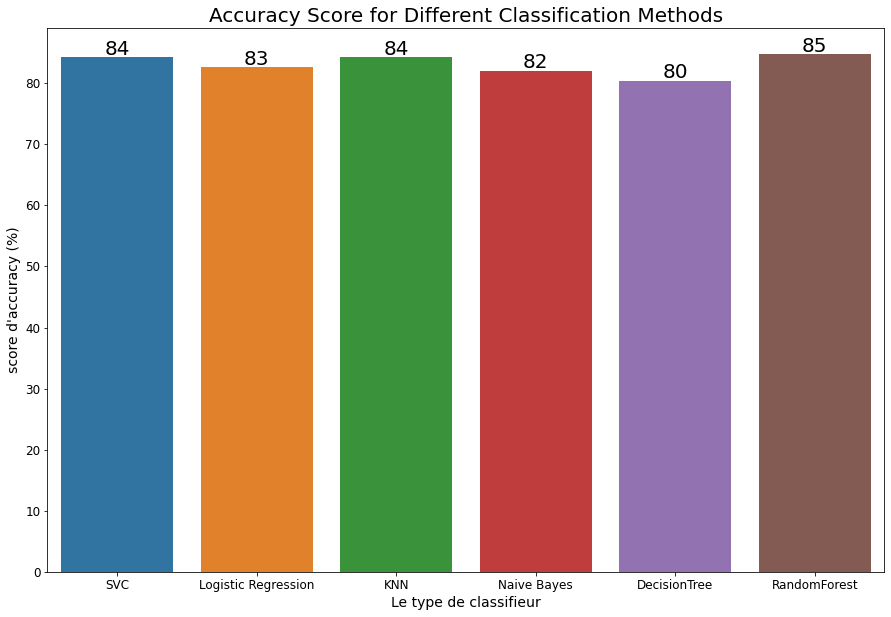

In [265]:
plt.figure(figsize=(15,10))

classifier_list = ['SVC', 'Logistic Regression','KNN', 'Naive Bayes', 'DecisionTree', 'RandomForest']
#Creating the barplot and showing the accuracy score for each method
chart = sns.barplot(x=classifier_list, y=accuracy_list, palette = 'tab10')
for p in chart.patches:
             chart.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=20, color='black', xytext=(0, 8),
                 textcoords='offset points')

plt.xlabel('Le type de classifieur', fontsize=14)
plt.ylabel('score d\'accuracy (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accuracy Score for Different Classification Methods', fontsize=20)

plt.show()

# déssiner un arbre en utilisant que 3 classes comme input

FastingBS,RestingECG et ST_Slope

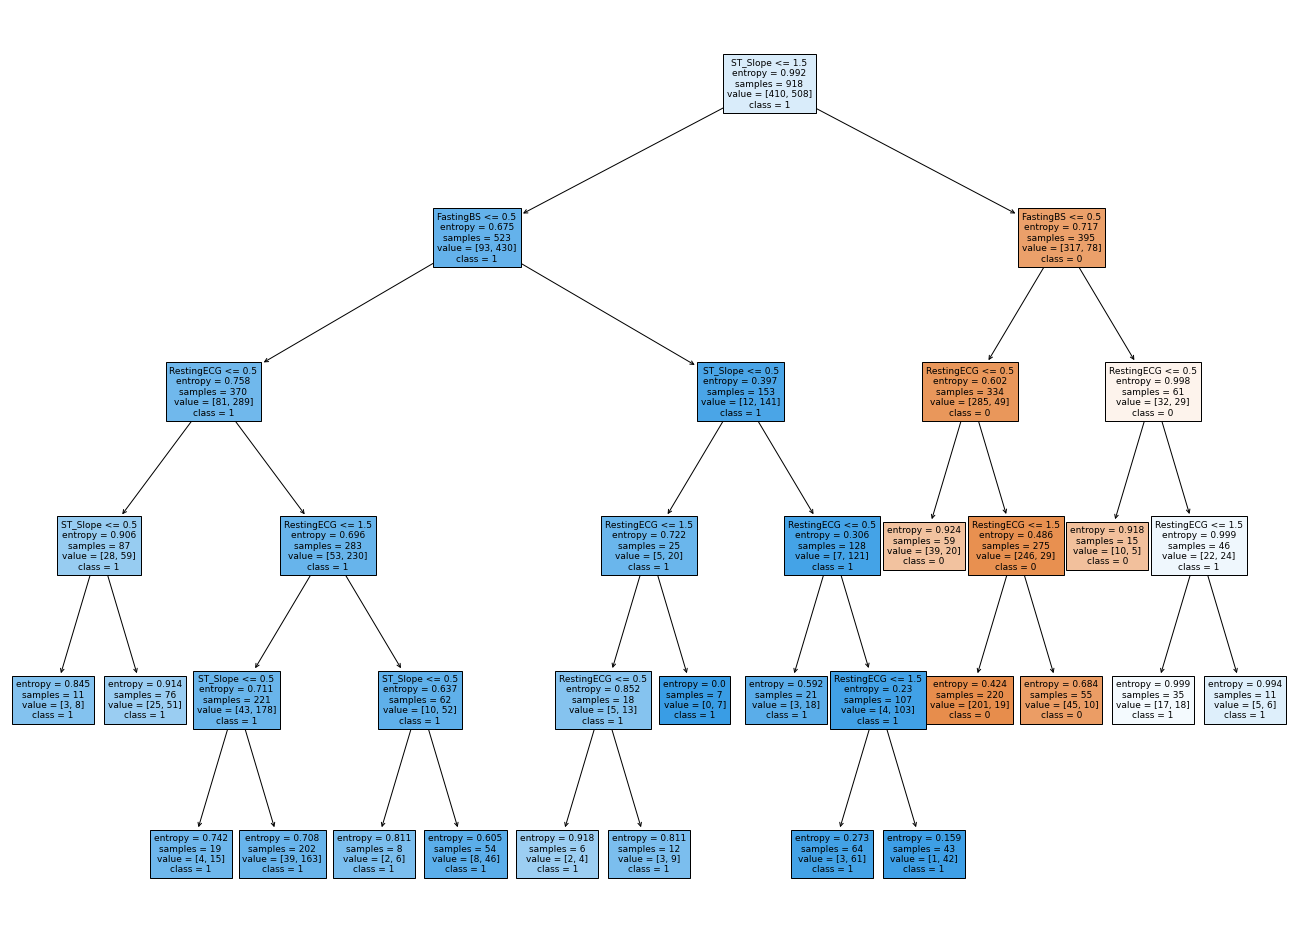

In [266]:
from sklearn import tree
tree_class2 = tree.DecisionTreeClassifier(criterion='entropy')
categorical2 = [  'FastingBS', 
               'RestingECG','ST_Slope']
X= new_df[categorical2]
Y = new_df['HeartDisease'].astype('string')
tree_class2.fit(X,Y)
plt.figure(figsize=(23,17))
tree.plot_tree(tree_class2, 
               fontsize=9,  # text font size
               filled=True, # background color on each node
               feature_names=categorical2,   # match feature id with caracteristic name
               class_names=tree_class2.classes_, # match class/target id with target/Iris type
              )
plt.show()

# K-means

**Regroupper les attributs par le target et utilisé que les attributs de type catégorie**

In [270]:
def attack_rate_per_value(df: pd.DataFrame, attribute: str) -> pd.Series:
    counts = new_df.groupby(by=attribute)['HeartDisease'].sum()
    counts = (counts / new_df['HeartDisease'].sum())
    return counts


In [273]:
X1 = new_df[features]
y2 = new_df['HeartDisease']
df_encoded = pd.concat((X1,y2),axis=1)

for col in features:
    encoding = attack_rate_per_value(df_encoded, col)
    df_encoded[col] = df_encoded[col].map(encoding)

df_encoded[features]

,Age,Oldpeak,Sex,FastingBS,ExerciseAngina
0,0.011811,0.253937,0.901575,0.665354,0.377953
1,0.021654,0.118110,0.098425,0.665354,0.377953
2,0.001969,0.253937,0.901575,0.665354,0.377953
3,0.029528,0.082677,0.098425,0.665354,0.622047
4,0.045276,0.253937,0.901575,0.665354,0.377953
...,...,...,...,...,...
913,0.005906,0.037402,0.901575,0.665354,0.377953
914,0.011811,0.005906,0.901575,0.334646,0.377953
915,0.051181,0.037402,0.901575,0.665354,0.622047
916,0.051181,0.253937,0.098425,0.665354,0.377953


**Utilisé le k-means pour créer des clusters**

In [276]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8,n_init=1000)
kmeans.fit(df_encoded[features])
df_encoded["cluster"] = kmeans.labels_
df_encoded.groupby(by=["cluster", "HeartDisease"]).size()

cluster  HeartDisease
0        0                34
         1               205
1        0                76
         1                 9
2        0               139
         1                48
3        0                 5
         1                84
4        0                29
         1                70
5        0                60
         1                51
6        0                10
         1                16
7        0                57
         1                25
dtype: int64